In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("BigMart_sales.csv") # read the Data

In [13]:
df.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [7]:
df.shape

(8523, 12)

#### Column Description:
- Item identifier : Item's Unique product ID
- Item_Weight : Weight of product
- Item_Fat_Content : Whether the product is low fat or not
- Item_Visibility : The % of the total display area of all products in a store allocated to the particular product
- Item_Type : The category to which the product belongs
- Item_MRP : Maximum Retail Price (list price) of the product
- Outlet_Identifier : Unique store ID
- Outlet_Establishment_Year : The year in which store store was established
- Outlet_Size : The size of the store in terms of ground area covered
- Outlet_Location_Type : The type of city in which the store is located
- Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales : Sales of the product in t particular store. This is the outcome variable to be predicted.

#### Problem Statements
- Analyse the data and understand the factors impacting the sales in each other.
- Identify the anamolies and trends in the data using charts and visuals.
- 
- Check for missing values and their distribution across variables, as missing data can significantly 
affect the quality and reliability of your analysis.
- Identify the data types and formats for each variable, as this information is essential for subsequent 
data manipulation and analysis steps.
- Look for any obvious errors or inconsistencies in the data, such as invalid values, mismatched units, 
or outliers, which could indicate data quality issues.

In [14]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

 Missing values (NAN) are to be replaced by some values in the Item_weight and Outlet_Size columns cause 
 they affect the quality and reliability of our analysis and therefore they needs to be handled or replaced in the process

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1. The Categorical Columns are :Item_Fat_Content,Item_Type,Outlet_size,Outlet_Location_Type,Outlet_Type
2. The Numerical Columns are :Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales

In [23]:
df.duplicated().sum()

0

In [36]:
categorcial_columns=df.select_dtypes(include ="object").columns
numerical_columns=df.select_dtypes(include ={"int64","float64"}).columns

In [44]:
categorcial_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [46]:
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [54]:
for cat in categorcial_columns:
    print(f"Unique values and their counts in {cat}")
    print(df[cat].value_counts())
    print("*******************")

Unique values and their counts in Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
*******************
Unique values and their counts in Item_Fat_Content
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64
*******************
Unique values and their counts in Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
*******************
Unique values an

In [48]:
### Data in the column fat content has to be fixed :convert LF ,low fat,reg to Low fat and Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular',
    'low Fat': 'Low Fat',  
    'Regular': 'Regular'
})

In [52]:
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [56]:
df['Outlet_Type'] = df['Outlet_Type'].replace({
    'Supermarket Type1': 'Supermarket Type',
    'Supermarket Type2': 'Supermarket Type',
    'Supermarket Type3': 'Supermarket Type'
})

In [58]:
df.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type    7440
Grocery Store       1083
Name: count, dtype: int64

In [64]:
df.fillna({"Item_Weight" :df.Item_Weight.mean(), "Outlet_Size":df.Outlet_Size.mode()[0]},inplace=True)

In [66]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

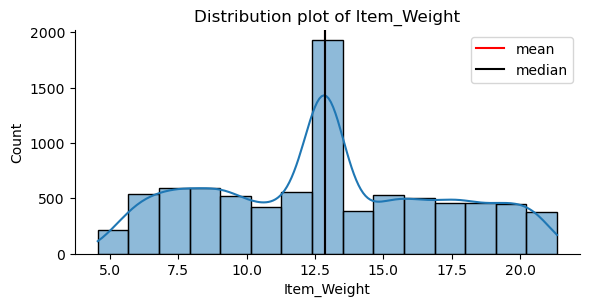

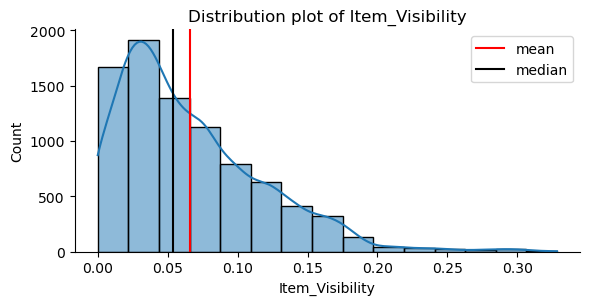

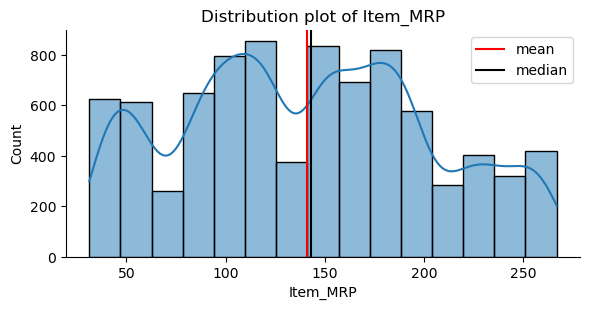

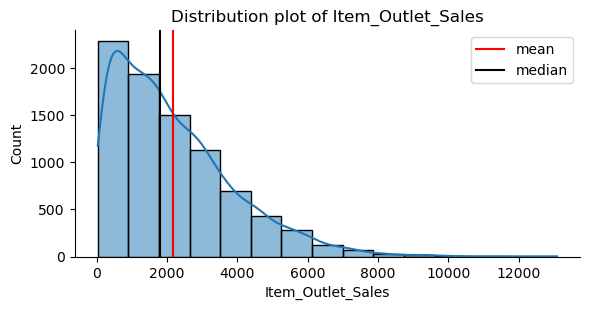

In [74]:
for num in numerical_columns:
    if num != "Outlet_Establishment_Year":
        sns.displot(data =df,x=num,bins=15,height = 3,aspect = 2 ,kde=True)
        plt.axvline(df[num].mean(),label="mean",c="red")
        plt.axvline(df[num].median(),label="median",c="black")
        plt.title(f"Distribution plot of {num}")            
        plt.legend()
        plt.show()  

- Item Outlets sales and Item visibility is positively skewed
- Not a clear pattern is visible in  Item_Weight and Item_MRP ,the data seems symmetrical in item_weight
- majority of the Item_Weight are around 12 units
- MRP values seems to follow approx.unifrom distribution 

In [77]:
## create a count plot for all categorcial_columns including establishment year

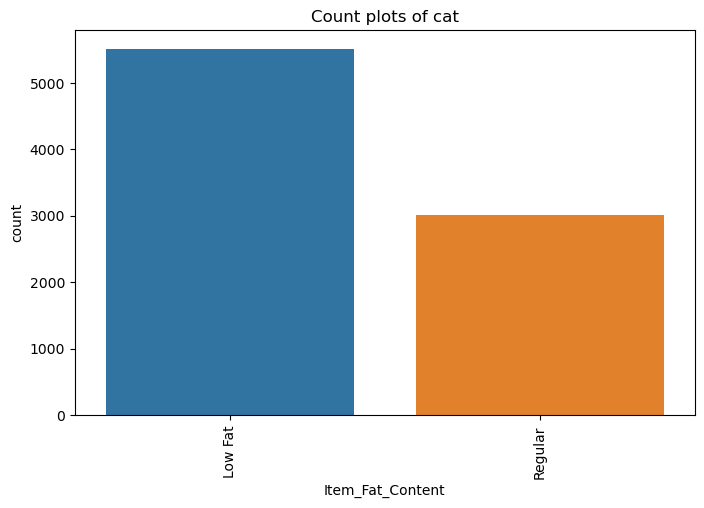

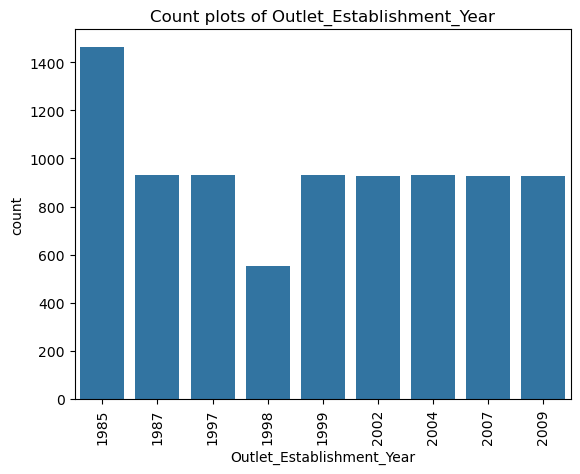

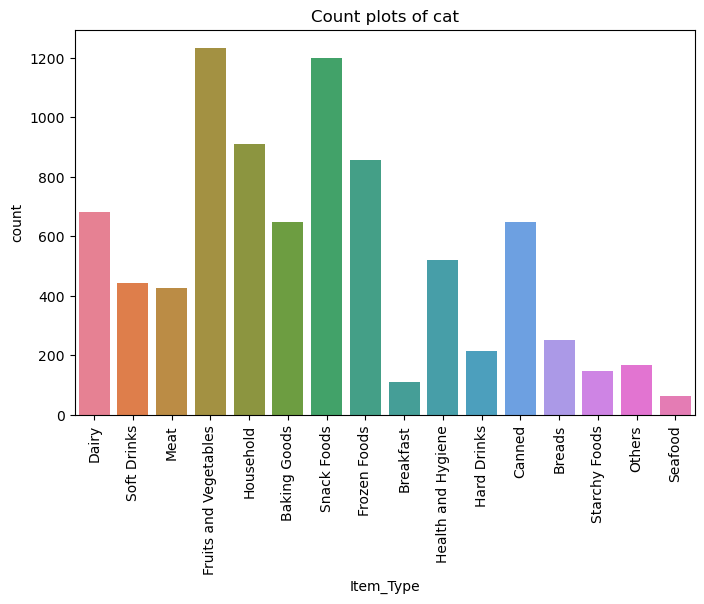

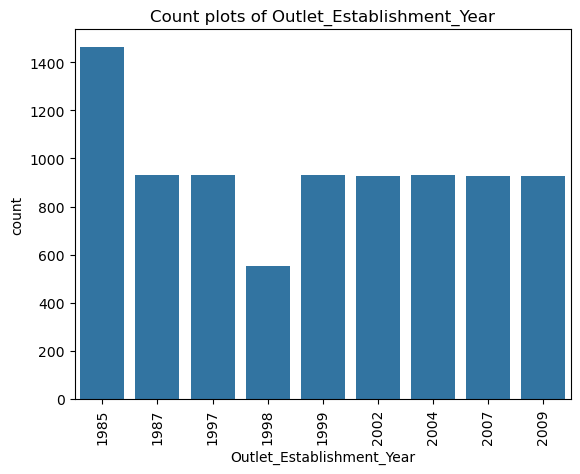

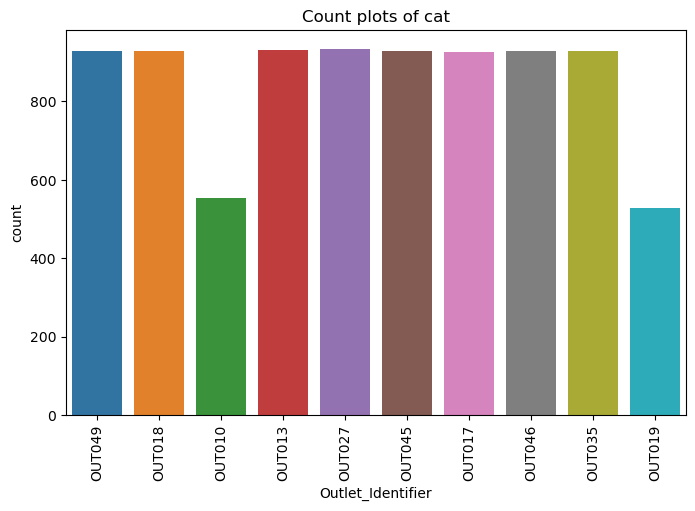

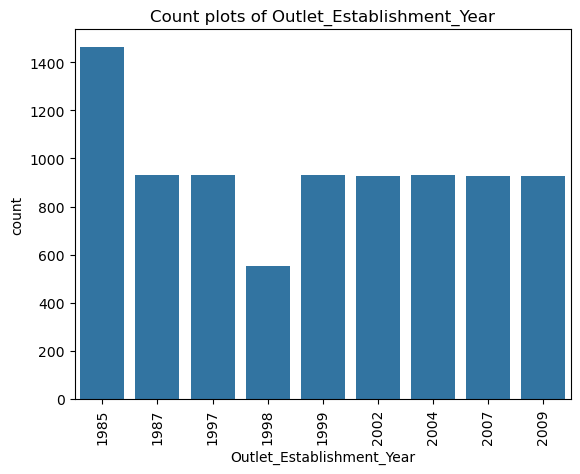

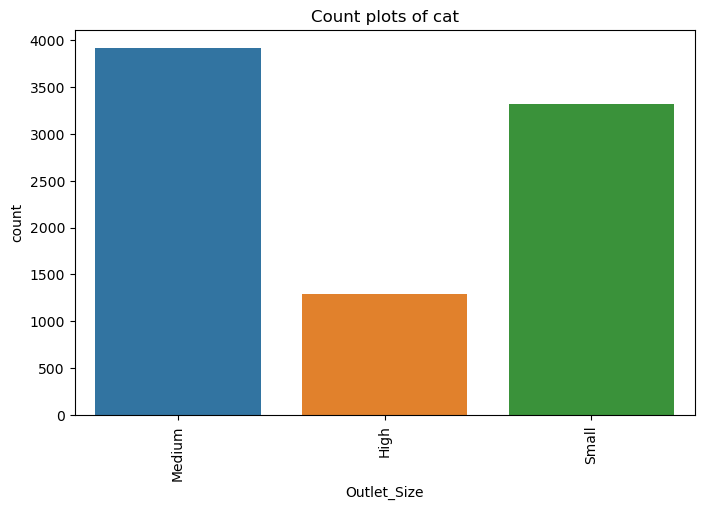

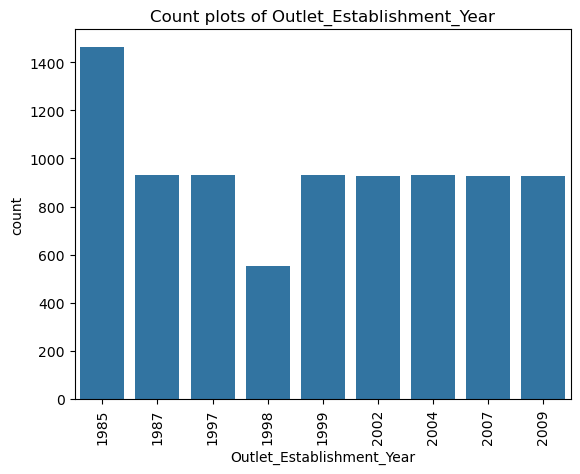

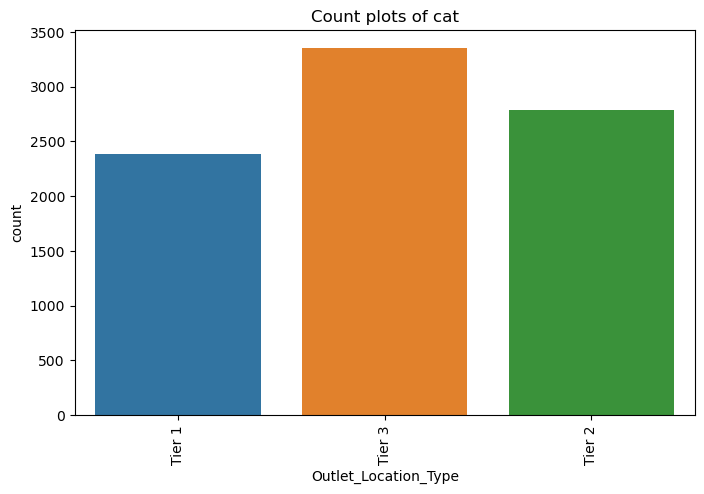

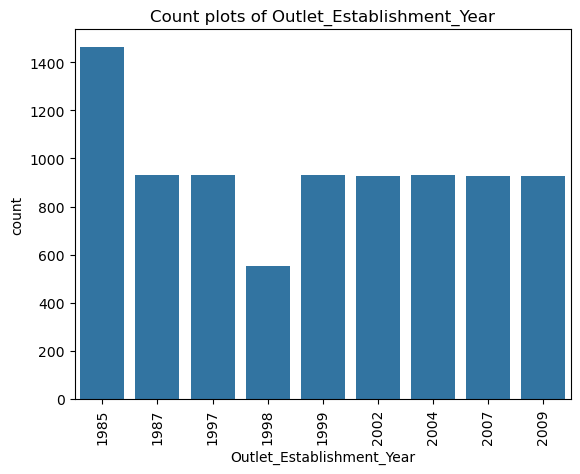

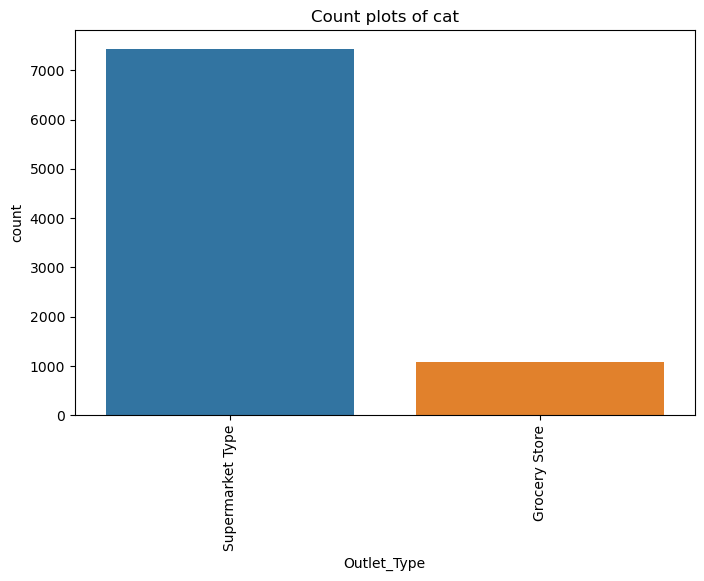

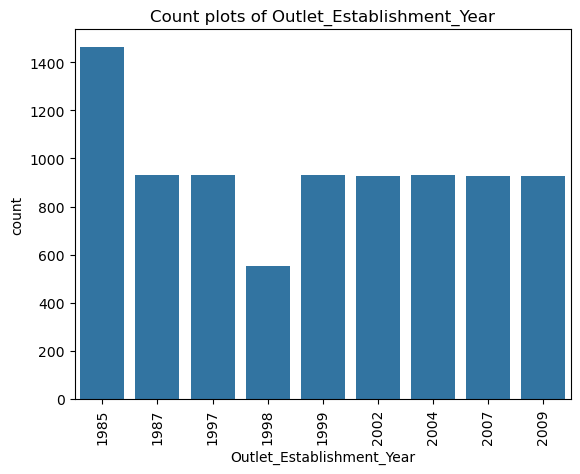

In [81]:
for cat in categorcial_columns:
    if cat != "Item_Identifier":
        plt.figure(figsize = (8,5))
        sns.countplot(data=df,x= cat,hue =cat)
        plt.title(f"Count plots of cat")
        plt.xticks(rotation = 90)
        plt.show()
        sns.countplot(data=df,x='Outlet_Establishment_Year')
        plt.title(f"Count plots of Outlet_Establishment_Year")
        plt.xticks(rotation = 90)
        plt.show()

In [17]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
df.describe(include ="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,8523.0,NaN,NaN,NaN,12.857645,4.226124,4.555,9.31,12.857645,16.0,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,8523,3,Medium,3912,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


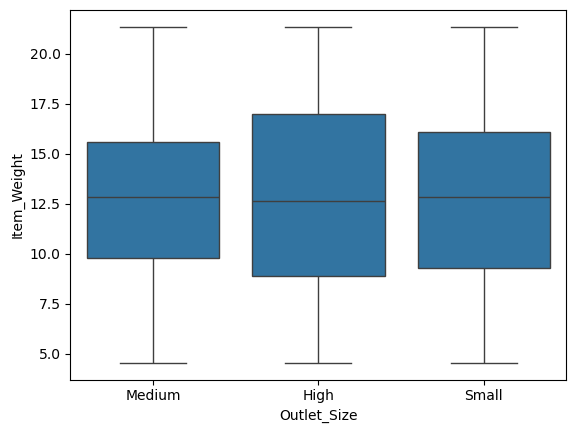

In [19]:
sns.boxplot(data=df,y='Item_Weight',x='Outlet_Size')
plt.show()

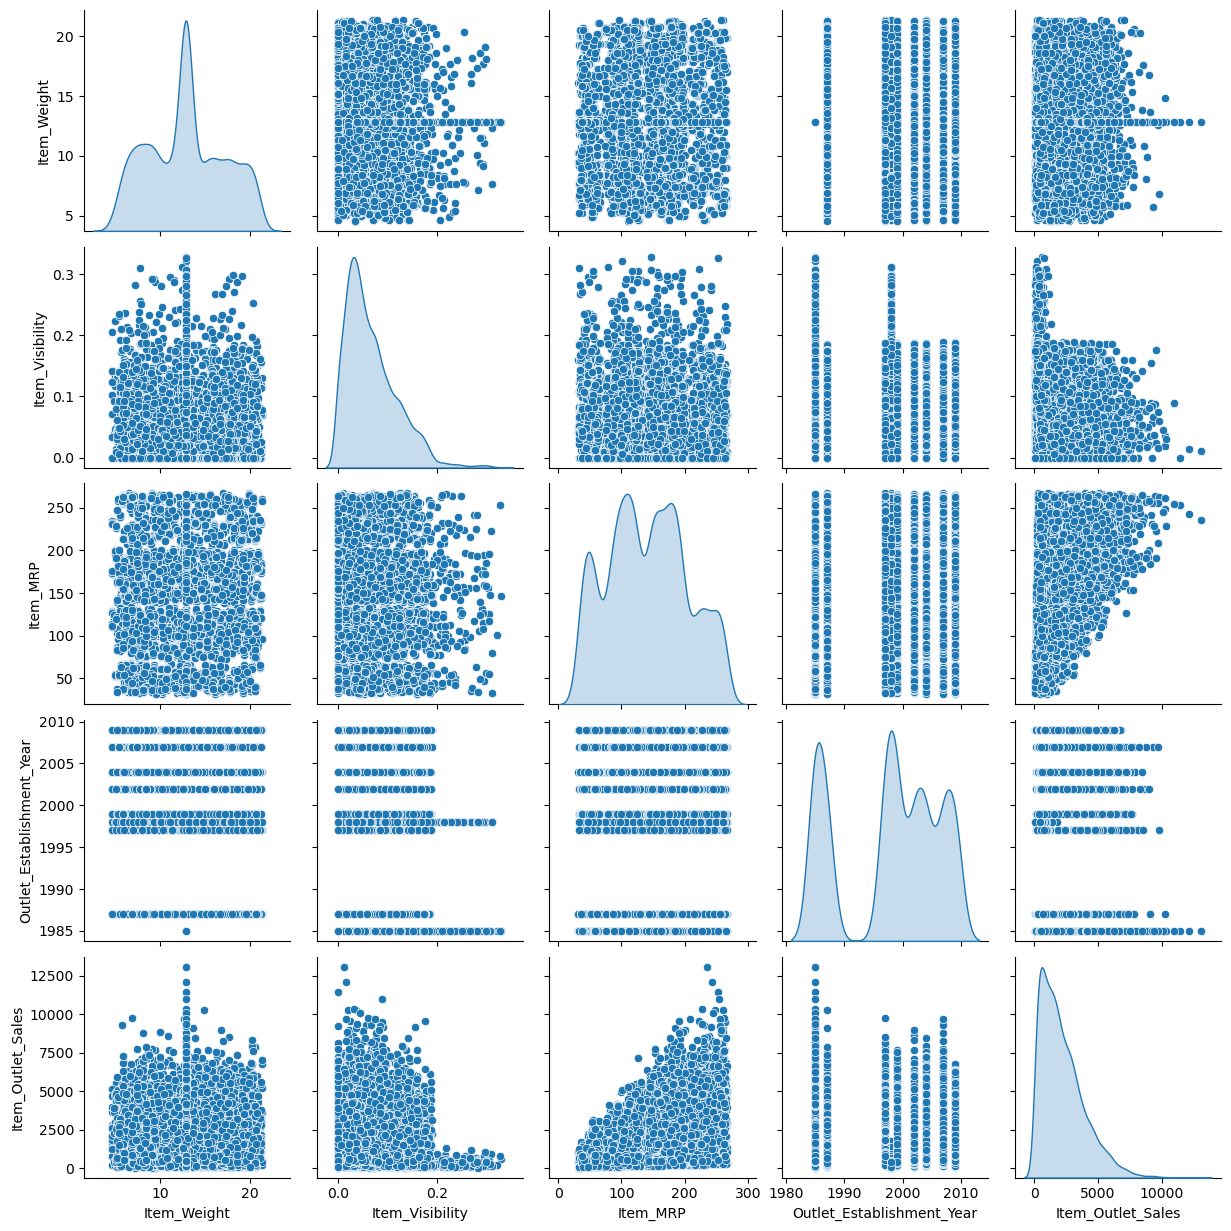

In [20]:
sns.pairplot(df,diag_kind = 'kde')
plt.show()

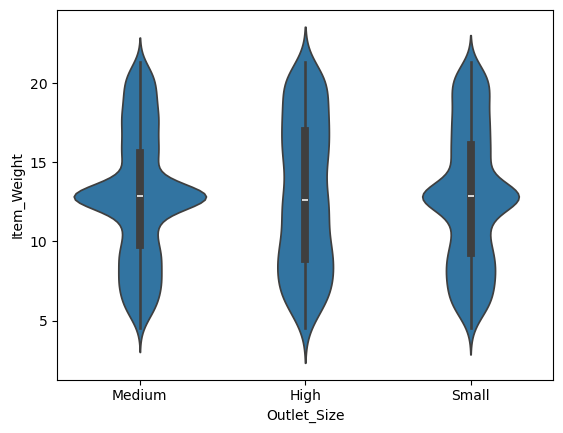

In [21]:
sns.violinplot(data=df,y='Item_Weight',x='Outlet_Size')
plt.show()

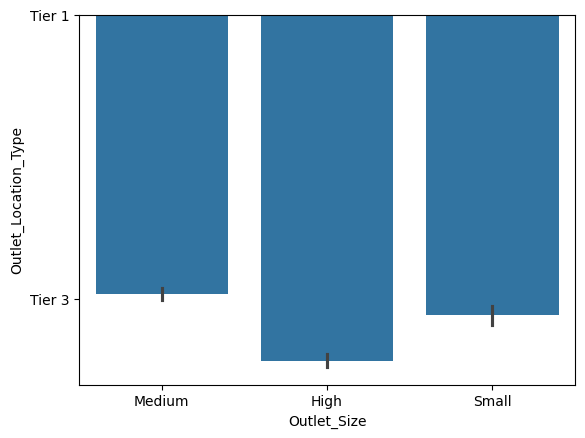

In [23]:
sns.barplot(data=df,x='Outlet_Size',y='Outlet_Location_Type')
plt.show()

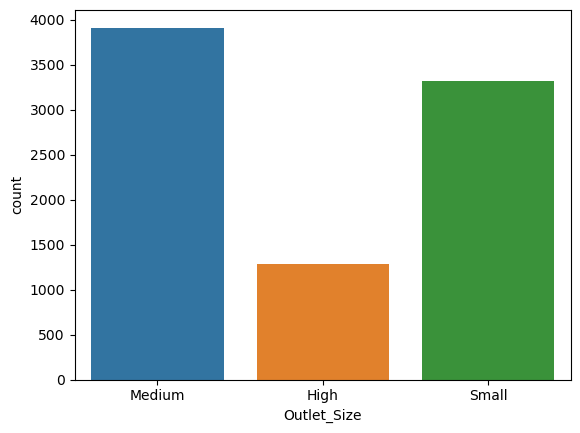

In [24]:
sns.countplot(data=df,x='Outlet_Size',hue ='Outlet_Size')
plt.show()

In [25]:
df.shape

(8523, 12)

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


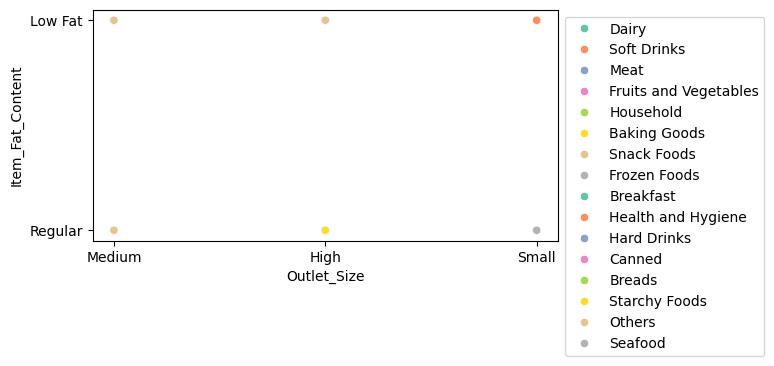

In [96]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df,y='Item_Fat_Content',hue='Item_Type',sizes=(17,70),x ='Outlet_Size',palette = "Set2")
plt.legend(bbox_to_anchor =(1,1))
plt.show()

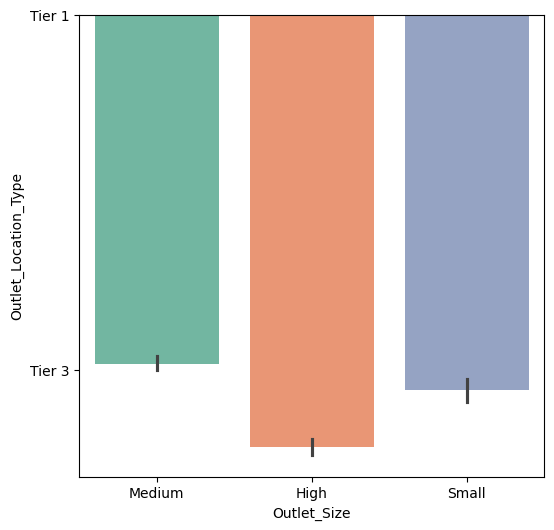

In [78]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df,x ='Outlet_Size',y='Outlet_Location_Type',hue = 'Outlet_Size',palette = "Set2")
plt.show()

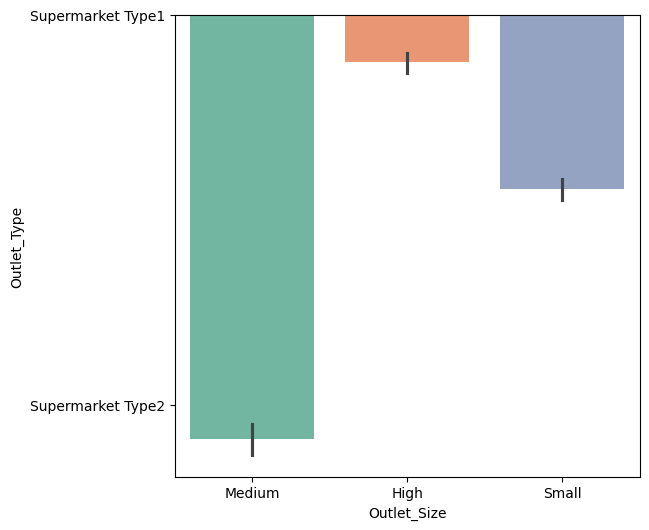

In [80]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df,x ='Outlet_Size',y='Outlet_Type',hue = 'Outlet_Size',palette = "Set2")
plt.show()

In [98]:
df.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


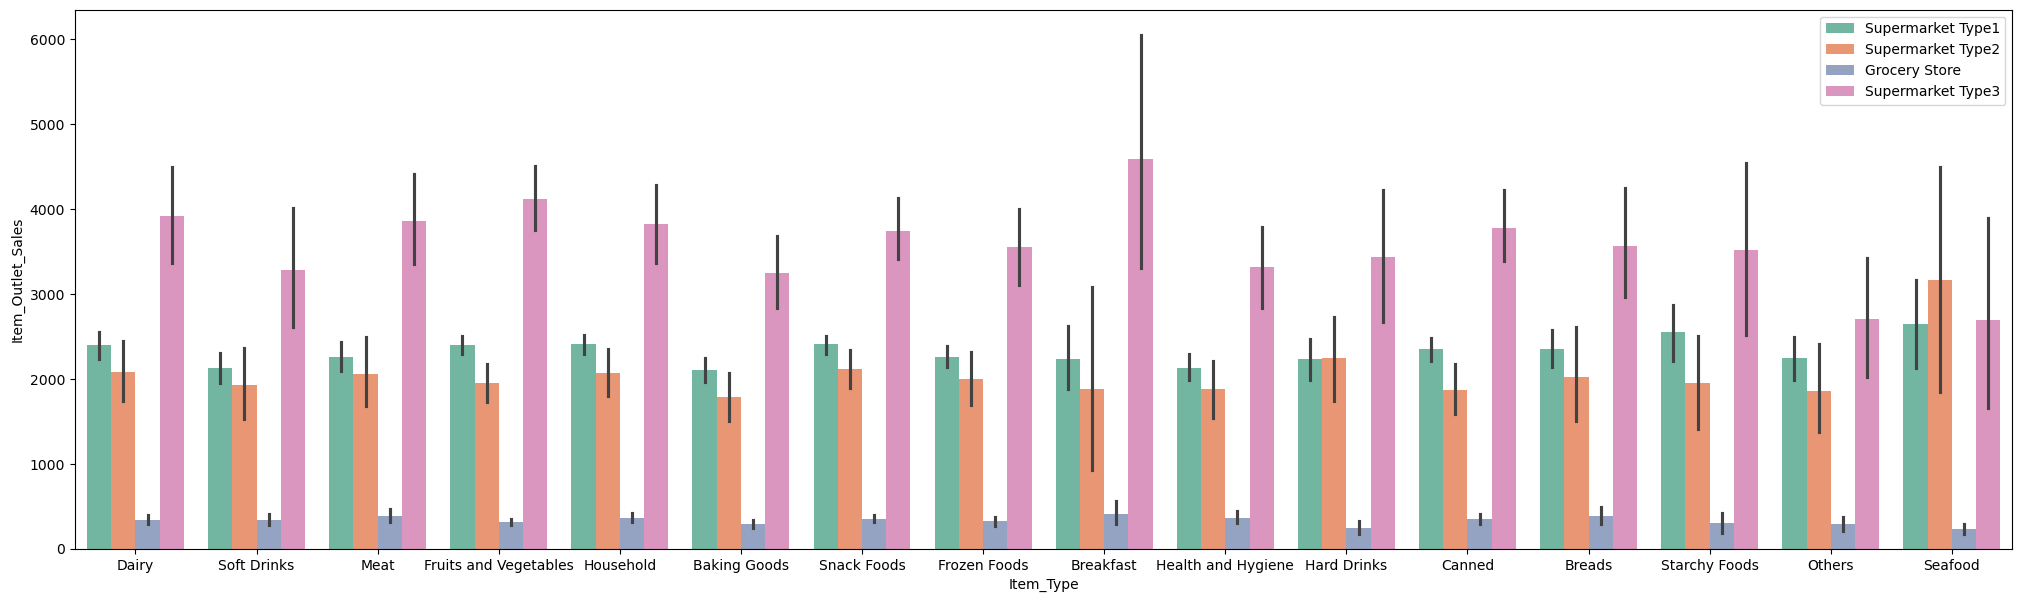

In [120]:
plt.figure(figsize=(25, 7))
sns.barplot(data=df,x ='Item_Type',y='Item_Outlet_Sales',hue = 'Outlet_Type',palette = "Set2")
plt.legend(bbox_to_anchor =(1,1))
plt.show()